# CA1 Ana Isabel Nieves Barcenas 



## **Sumarry**

* Dataset Overview
 * Scenario 
 * Data Ditiorany
 
* EDA
 * Characterisation of the data set
 * Descriptive Statistics
 * Outliers


* Handling with missing values
 * Mark invalid/ corrupt values as missing
 * Invalid Data Types
 * Missing Value Statistics 
 * Remove colums with missing values
 * Imputing Missing Values

* Feature Engineering 
 * Encoding
 * Scaling 
 
* PCA

* Curse of Dimensionality

* Conclusions

* References


## Dataset Overview

### Scenario

You have been retained by a haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage.

The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The dataset’s positive class consists of component failures for a specific component of the APS system. 

The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts. This analysis will help determine the investment strategy for the company in the upcoming year. 

### Data Dictionary


<table>
  <thead>
    <tr>
      <th>Columns</th>
      <th>Value</th>
      <th>Dtype</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Class</td>
      <td>neg/pos </td>
      <td>string/object </td>
      <td>The dataset’s positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS  </td>
    </tr>
    <tr>
      <td>All the other columns</td>
      <td>0 to 8.584298e+09</td>
      <td>float</td>
      <td> Component sensor result</td>
    </tr>
  </tbody>
</table>



## EDA

As mentioned by (Boschetti and Luca Massaron, 2016) Exploratory data analysis **EDA**, or data exploration, is the first step in the data science process.

**EDA** is used to investigate and analyse data sets and summarise their main characteristics, often using data visualisation methods. It helps determine the best way to manipulate data sources to better answer the needs of your case study, allowing you to discover patterns, detect anomalies, test a hypothesis or check assumptions.



### Characterisation of the data set

We need to import all the libraries that we need to use in this project, each library is used for a different purpose; Python libraries are an excellent data analysis and machine learning tool. 

In [1]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import matplotlib as plt1
from matplotlib import pyplot
from sklearn.decomposition import PCA
import missingno as msno
from sklearn.preprocessing import StandardScaler



import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_columns', 175) # Help me to visualice all the columns 

In [2]:
df_ap= pd.read_csv("aps_failure_set.csv")
df_ap.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

To get a general and quick description of the dataset, we are going to use the pandas **datafream.info()** function, with this method we can print the information or summary of the data set, such as our data type, the number of columns that we have, non-values and memory usage.

In [3]:
df_ap.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Dtype 
---   ------  ----- 
 0    class   object
 1    aa_000  int64 
 2    ab_000  object
 3    ac_000  object
 4    ad_000  object
 5    ae_000  object
 6    af_000  object
 7    ag_000  object
 8    ag_001  object
 9    ag_002  object
 10   ag_003  object
 11   ag_004  object
 12   ag_005  object
 13   ag_006  object
 14   ag_007  object
 15   ag_008  object
 16   ag_009  object
 17   ah_000  object
 18   ai_000  object
 19   aj_000  object
 20   ak_000  object
 21   al_000  object
 22   am_0    object
 23   an_000  object
 24   ao_000  object
 25   ap_000  object
 26   aq_000  object
 27   ar_000  object
 28   as_000  object
 29   at_000  object
 30   au_000  object
 31   av_000  object
 32   ax_000  object
 33   ay_000  object
 34   ay_001  object
 35   ay_002  object
 36   ay_003  object
 37   ay_004  object
 38   ay_005  object
 39   ay_006  object
 40   ay

As we can see this datafream consists of 60000 datapoints and 171 columns including our label "class"

we can also observe that the types that we have are all of them object, this should be only for the "class" because is a quantitative data. that happens because in these columns we do not  just have numbers we also have some "na" which means the data is corrupt. 
We also use **.describe()** from the pandas library, to have a more statistical description of our data set.

In [4]:
df_ap.describe(include="all")

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,NaN,30,2062,1887,334,419,155,618,2423,7880,23072,40798,40616,32126,18933,5356,43572,4056,895,160,9018,10583,48205,47724,44673,34922,69,22,3512,57,3861,2216,467,920,987,1033,1768,19697,34629,38652,37823,448,9185,7379,9065,21531,34078,44602,12307,3877,1272,337,44841,40165,35959,32915,30674,29594,29282,25167,11817,6798,49393,2808,3566,3919,1099,43569,25241,42099,38360,12918,11970,9038,7097,5839,4969,4277,3807,12835,45481,49350,49347,52849,22628,16548,28319,30171,43860,2,22076,526,647,3,45965,7618,45044,973,2124,1531,5420,14790,34111,42087,38555,32427,21997,10118,3056,1861,2316,49348,75,9298,3344,28278,35194,34559,42559,40917,17301,774,54,2618,3520,32929,25237,749,10728,264,147,33178,6564,1894,403,1314,1056,5619,73,257,182,222,21099,20515,11569,8111,6683,26313,15911,28496,30140,14736,6312,48,135,27832,31142,3931,41816,38246,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,NaN,na,0,na,0,0,0,0,0,0,0,0,0,0,0,0,na,0,0,0,0,0,na,na,na,na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,na,0,0,0,0,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,0,0,na,na,na,1209600,0,0,na,0,na,0,na,0,0,0,0,0,0,0,0,0,0,0,0,na,0,na,na,0,0,0,0,0,0,0,0,0,0,na,na,na,na,0,na,0,0,na,na,na,0,0,0,0,0,0,0,0,na,0,0,0,0,na,na,0,0,0,0,0,0,0,na,na,0,0,0,0,0,0,0,0,0,0,0,0
freq,59000,NaN,46329,8752,14861,55543,55476,59133,58587,56181,46894,1305,1941,1238,15875,25091,40698,645,53588,46919,55227,37473,37295,642,589,642,589,54928,59350,53395,59310,10008,10191,58761,58192,58162,58078,57158,30338,16604,7432,4944,58789,1096,1458,1280,1184,1147,1129,8672,45094,54222,57445,1089,1139,1172,1204,1236,1328,1997,8038,24854,39619,645,19296,4030,6951,25294,642,642,589,589,23034,27277,39549,44009,46333,47740,48722,49264,726,167,691,691,3257,1224,1384

In [5]:
df_ap.describe(include="object")

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,23072,40798,40616,32126,18933,5356,43572,4056,895,160,9018,10583,48205,47724,44673,34922,69,22,3512,57,3861,2216,467,920,987,1033,1768,19697,34629,38652,37823,448,9185,7379,9065,21531,34078,44602,12307,3877,1272,337,44841,40165,35959,32915,30674,29594,29282,25167,11817,6798,49393,2808,3566,3919,1099,43569,25241,42099,38360,12918,11970,9038,7097,5839,4969,4277,3807,12835,45481,49350,49347,52849,22628,16548,28319,30171,43860,2,22076,526,647,3,45965,7618,45044,973,2124,1531,5420,14790,34111,42087,38555,32427,21997,10118,3056,1861,2316,49348,75,9298,3344,28278,35194,34559,42559,40917,17301,774,54,2618,3520,32929,25237,749,10728,264,147,33178,6564,1894,403,1314,1056,5619,73,257,182,222,21099,20515,11569,8111,6683,26313,15911,28496,30140,14736,6312,48,135,27832,31142,3931,41816,38246,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,0,0,0,0,0,0,na,0,0,0,0,0,na,na,na,na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,na,0,0,0,0,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,0,0,na,na,na,1209600,0,0,na,0,na,0,na,0,0,0,0,0,0,0,0,0,0,0,0,na,0,na,na,0,0,0,0,0,0,0,0,0,0,na,na,na,na,0,na,0,0,na,na,na,0,0,0,0,0,0,0,0,na,0,0,0,0,na,na,0,0,0,0,0,0,0,na,na,0,0,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,1305,1941,1238,15875,25091,40698,645,53588,46919,55227,37473,37295,642,589,642,589,54928,59350,53395,59310,10008,10191,58761,58192,58162,58078,57158,30338,16604,7432,4944,58789,1096,1458,1280,1184,1147,1129,8672,45094,54222,57445,1089,1139,1172,1204,1236,1328,1997,8038,24854,39619,645,19296,4030,6951,25294,642,642,589,589,23034,27277,39549,44009,46333,47740,48722,49264,726,167,691,691,3257,1224,13841,4356,726,3255,59324,11845,2146

We can notice that most of the measures of central statistics appear with NaN values, this is due to the type of data we have, most of the feactures are object, which is considered as categorical so we could only get unique values, top, freq for these variables.

According to (Bruce and Bruce, 2017) we can only use mode as a measure of central tendency for all data types.


### Descriptive Statistics

Descriptive statistics are used to easily describe the basic characteristics of data sets, they provide a simple summary of the sample and the measures, with them we can obtain simple graphs that help us to better understand the behaviour of our variables.

We will use the variable **"aa_00"** to observe the behaviour of our data, due to the size of our data, considering only one variable is not the best option, but for the moment it is the only variable that is defined as quantitative. 

In [6]:
df_ap["aa_000"].describe()

count    6.000000e+04
mean     5.933650e+04
std      1.454301e+05
min      0.000000e+00
25%      8.340000e+02
50%      3.077600e+04
75%      4.866800e+04
max      2.746564e+06
Name: aa_000, dtype: float64

[Text(0.5, 1.0, 'aa_000')]

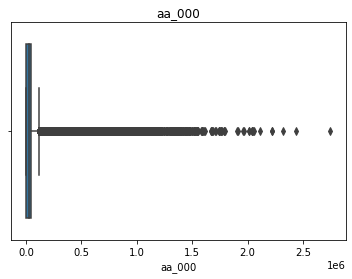

In [7]:
sns.boxplot(df_ap["aa_000"]).set(title="aa_000")

[Text(0.5, 1.0, 'Distribution of aa_000')]

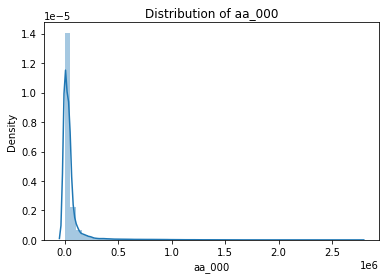

In [8]:
sns.distplot(df_ap["aa_000"]).set(title="Distribution of aa_000")

In [9]:
skewness_aa000 = df_ap["aa_000"].skew()
print(skewness_aa000)

6.115752483633429


In [10]:
kurtosis=df_ap["aa_000"].kurtosis()
print (kurtosis)

48.29744108861675


as we can observe in the results obtained above we can say that the variable "aa_000" does not follow a normal distribution because the mean and median value are not equal, by obtaining the distribution plot of the data we can say that our data has a positive skewness, when we choose the skewness of the column we can check that our asseveration is correct, we can also say that our data has a high kurtosis which indicates that the data shows more extreme outliers than a normal distribution, when we analyse our boxplot we find a large amount of outliers, so the mean can be affected.

Now let's plot how the values are distributed in our class column, which is our label for this case study.




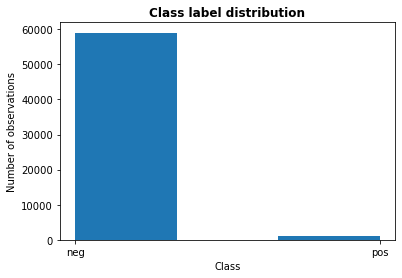

In [11]:
x = df_ap["class"]
plt.hist (x, bins =3,)
plt.xlabel('Class')
plt.ylabel('Number of observations')
  
plt.title('Class label distribution',
          fontweight ="bold")
plt.show()

As can be seen in the graph the data is extremely unbalanced, 59000 points belong to the negative class and the remaining 1000 points belong to the positive class. This indicates that we have an unbalanced binary classification problem.

(Fernández et al., 2018) argues that the learning process of most classification algorithms is often biased toward the majority class examples, so that minority ones are not well modeled into the final system.



## Handling with missing values


Missing data are not rare in real data sets. In fact, the chance that at least one data point is missing increases as the data set size increases. (Kuhn and Johnson, 2019,p.189)

There is no perfect way to handle with missing values that will give you an accurate result as to what the real missing value is, but there are different techniques to get decent performance.
You should base your decision on how to deal with missing values on the knowledge you have of the database, it may be that to ease training time and increase the pressure on your model, you may want to eliminate missing values, but this is not always the best option. 


In [12]:
df_ap.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [13]:
df_ap.isnull().values.any()  # NaN values are marked True

False

According to the result we do not have missing values,this happens because python does not recognize na,?,n.a,-- as missing values, it considers them as part of the data, that is why we have to recognize all these values ​​as missing values ​​with the following code.

### Invalid datatypes

there are values that do not make sense with the type of data you are working with, to understand this in a clearer way, let's see in detail what happens in our database, we have that all our independent variables are sensors so we assume that the values that they must contain are numeric, however as we saw at the beginning of the project we can see that the type of data that we have is strings which means that within these features there must be some data that is not numeric, so we would be corrupting the database. To have a quick view of this we can use the function **datafream.head() and dataFream.tail()** to see the beginning and end of our data table, with this we could see if there is any value that is not numeric within the cells.


As they say(Witten and Al, 2017) They may occur for a number of reasons, such as malfunctioning measurement equipment, changes in experimental design during data collection, and collation of several similar but not identical datasets. 


In [14]:
df_ap.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

In [15]:
df_ap.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,2564,59100,1603216,6015982,1968266,164972,12560,4880368,0,280,0,1224,2114,8913782,7998174,1929126,776370,2,0,0,0,3328,1080,0,0,0,0,0,45114,2533260,2542338,4705948,0,7620,3470,4506,7466,60160,9737500,5938,0,0,0,3245782,2124728,917904,744468,580332,446850,496786,1264596,5214,0,10845228,1304,1206,1606,14,4880368,129760,1244058,678792,263320,221620,221100,245580,152420,212500,151980,199220,247880,153001.45,10845228,10845228,10850870,71618,64462,108200,1153820,9826660,1209600,243498,0,84,0,8289544.32,0,1529548.8,102,2360,0,860,16808,404890,3156012,5101686,1080888,56042,9214,260,224,574,10845228,na,12450,1270,138036,1107360,425276,5875496,2230222,36428,122,0,344,742,1760956,23486,0,146,0,0,1872932,4936,1600,0,0,0,0,0,0,0,0,62846,137050,27546,0,0,265640,54496,470800,293652,0,0,0,0,80125300,2912.04,2858,1608808,1479066,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,0,104,99186,36564,128,0,0,56982,0,0,0,0,0,123604,108768,24020,11622,0,0,0,0,192,56,0,0,0,0,0,4610,99120,11292,20960,0,1238,28,28,34,276,134204,174,0,0,0,44228,60952,17376,8610,2990,1048,592,186,0,0,147638,2,14,716,0,56982,1900,14404,9572,na,na,na,na,na,na,na,na,23720,2285.92,147638,147638,150094,525.0,294,14558,147260,135982,1209600,3126,2,4,0,123344.64,0,11387.52,0,28,0,0,0,61572,63554,10126,602,128,0,0,0,6,147638,na,1340,32,3606,9664,2112,40190,75776,3066,196,0,330,214,123730,66850,0,18,0,10,124152,114,56,0,0,0,0,0,0,0,0,1066,808,600,0,0,2450,510,823720,82346,16440,20,0,0,1285980,80.4,82,13934,15024,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,0,28,11592,11538,0,0,0,8784,0,0,0,0,0,29698,23762,13970,874,0,0,0,0,36,20,0,0,0,0,0,0,0,704,22454,0,782,524,916,3940,924,13632,2440,0,0,0,18542,2236,856,490,162,424,234,158,20,36,43738,6,10,2,0,8784,480,7640,6224,na,na,na,na,na,na,na,na,13440,112.49,43738,43738,44562,83.0,0,4138,42880,23310,1209600,630,2,0,0,7518.72,4221.12,10493.76,22,96,0,0,0,3956,14690,4040,464,8,0,0,0,68,43738,0,1034,24,72,518,5348,14382,1772,8,0,0,38,36,8864,2482,0,184,0,0,8864,148,74,0,7042,0,0,0,0,0,0,622,0,0,4544,2398,162,58,7920,784,9112,0,0,0,0,2.76,134,15876,2740,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,0,330,202498,3251010,2061456,360436,59754,2634394,0,0,0,0,0,4543410,3227856,1615634,1214970,0,0,57300,0,2124,1090,0,0,0,0,0,119742,4445146,1370596,0,0,5518,4092,4534,10448,940376,4970242,274,0,0,0,2154166,1022460,385878,287818,239818,265302,552874,1027168,0,0,6159728,64,78,424,70,2634394,105862,580084,1032454,302700,332300,308960,282140,362360,na,na,na,18940,80292.76,6159728,6159728,6092764,50665.0,102012,3012,103140,5935484,1209600,240008,2,122,0,4776505.92,106006.08,1048805.76,0,1254,0,0,0,11460,760936,3250610,1761252,1335

As we can see above we have "na" values within the first column "ab_000" and we can observe this value within the whole dataset, Pandas does not recognise this "na" value as missing values because data can be expressed in many ways and forms, the pandas library intends to be flexible with respect to the handling of such data. That is why panda recognises missing values by two values:

**None** : for object. 

**NaN**: for Not Number.

### Mark invalid/ corrupt values 

As mentioned before it is necessary to mark and recognise all those "na" values as NaN values in pandas in order to have a clear idea of how many missing values we really have, for that we will use the following function, which will allow us to replace all the na by NaN values.  


In [16]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df_ap= pd.read_csv("aps_failure_set.csv", na_values = missing_value_formats)

In [17]:
df_ap.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,13064

In [18]:
df_ap.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

On a first approximation we can see that the values were replaced by NaN, now pandas will be able to recognise these values as missing values, to confirm this we have used the **datafream.dtype()** function to make sure that the data type has changed. Since we have fixed the issues of invalid and corrupt values; now we just need to convert the first column "aa_000" to float, but that is easy to fix using the following code.

In [19]:
df_ap['aa_000'] = df_ap['aa_000'].astype(float)

In [20]:
df_ap.dtypes

class      object
aa_000    float64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

Once our data is correctly identified and the data type is correct we can take a look and see how many missing values we actually have. 

The easiest way to check for missing values is provided by the pandas library, they are insull() and notnull() these are functions that always return a binary value, in this case false or true indicating whether the value of the argument passed contains missing values. 

In [21]:
df_ap.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [22]:
df_ap.isnull().values.any()

True

Now we can say with certainty that all missing values are correctly identified, this will allow us to analyse in more detail how to handle them.

### Missing Value Statistics

Once our data has been correctly identified, we proceed to use some graphs to better visualise the total amount of missing values.

For this we will use a new python library called Missingno, this library is an excellent easy tool that provides us with a series of visualisations to understand the distribution of missing data within a dataframe panda. 

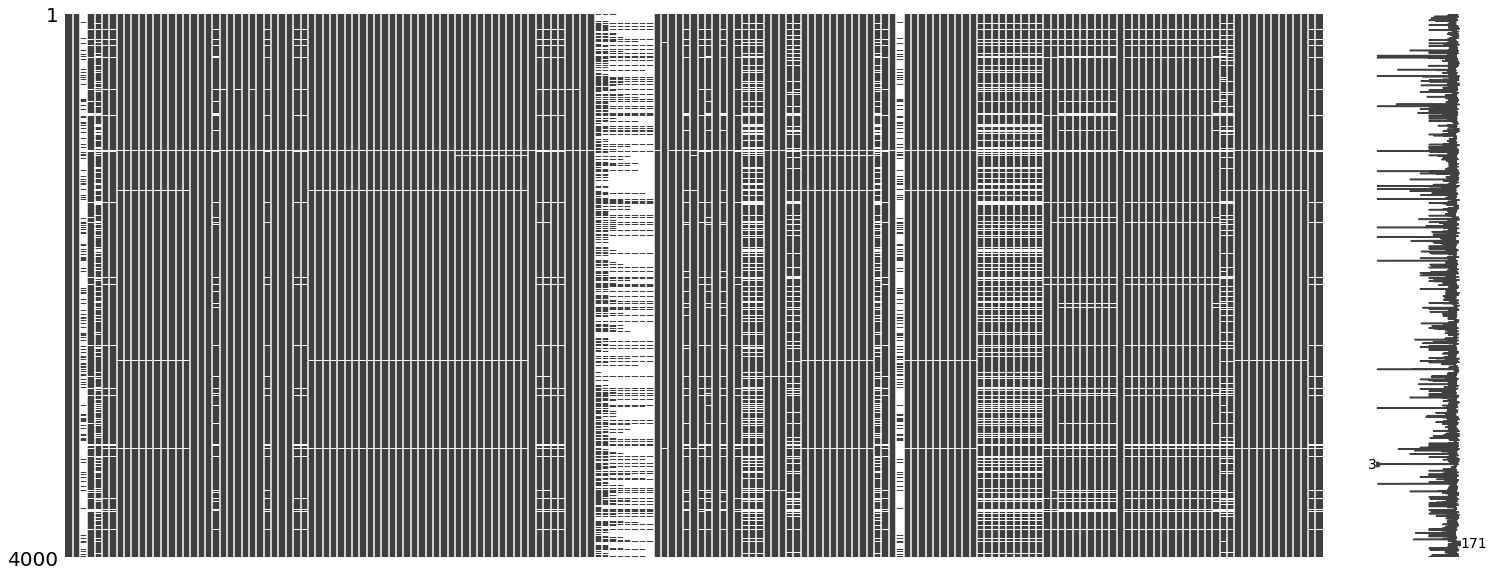

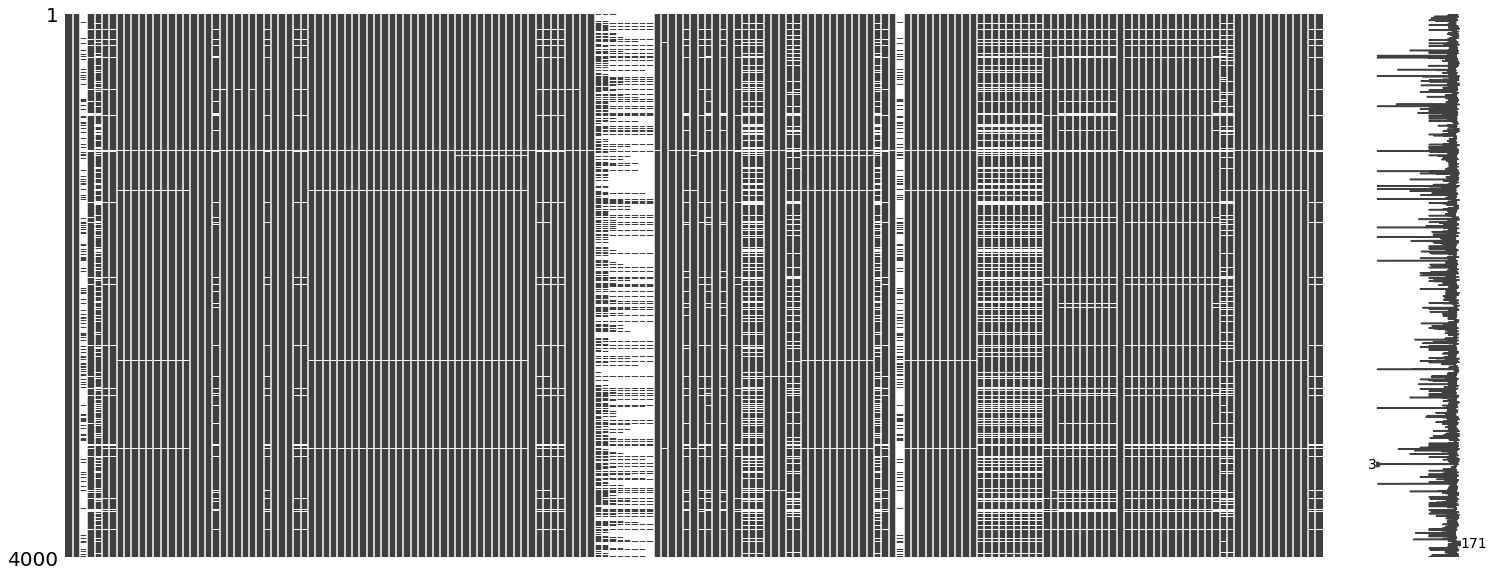

In [23]:
ax = msno.matrix(df_ap.sample(4000))
ax.get_figure()

In the matrix we can observe that right in the middle of the columns there is a large number of missing values, which could indicate some special kind of pattern, however we also observe that there are more missing values in the whole data set, which leads us to conclude that the missing values are randomly found in the whole data set.


<AxesSubplot:>

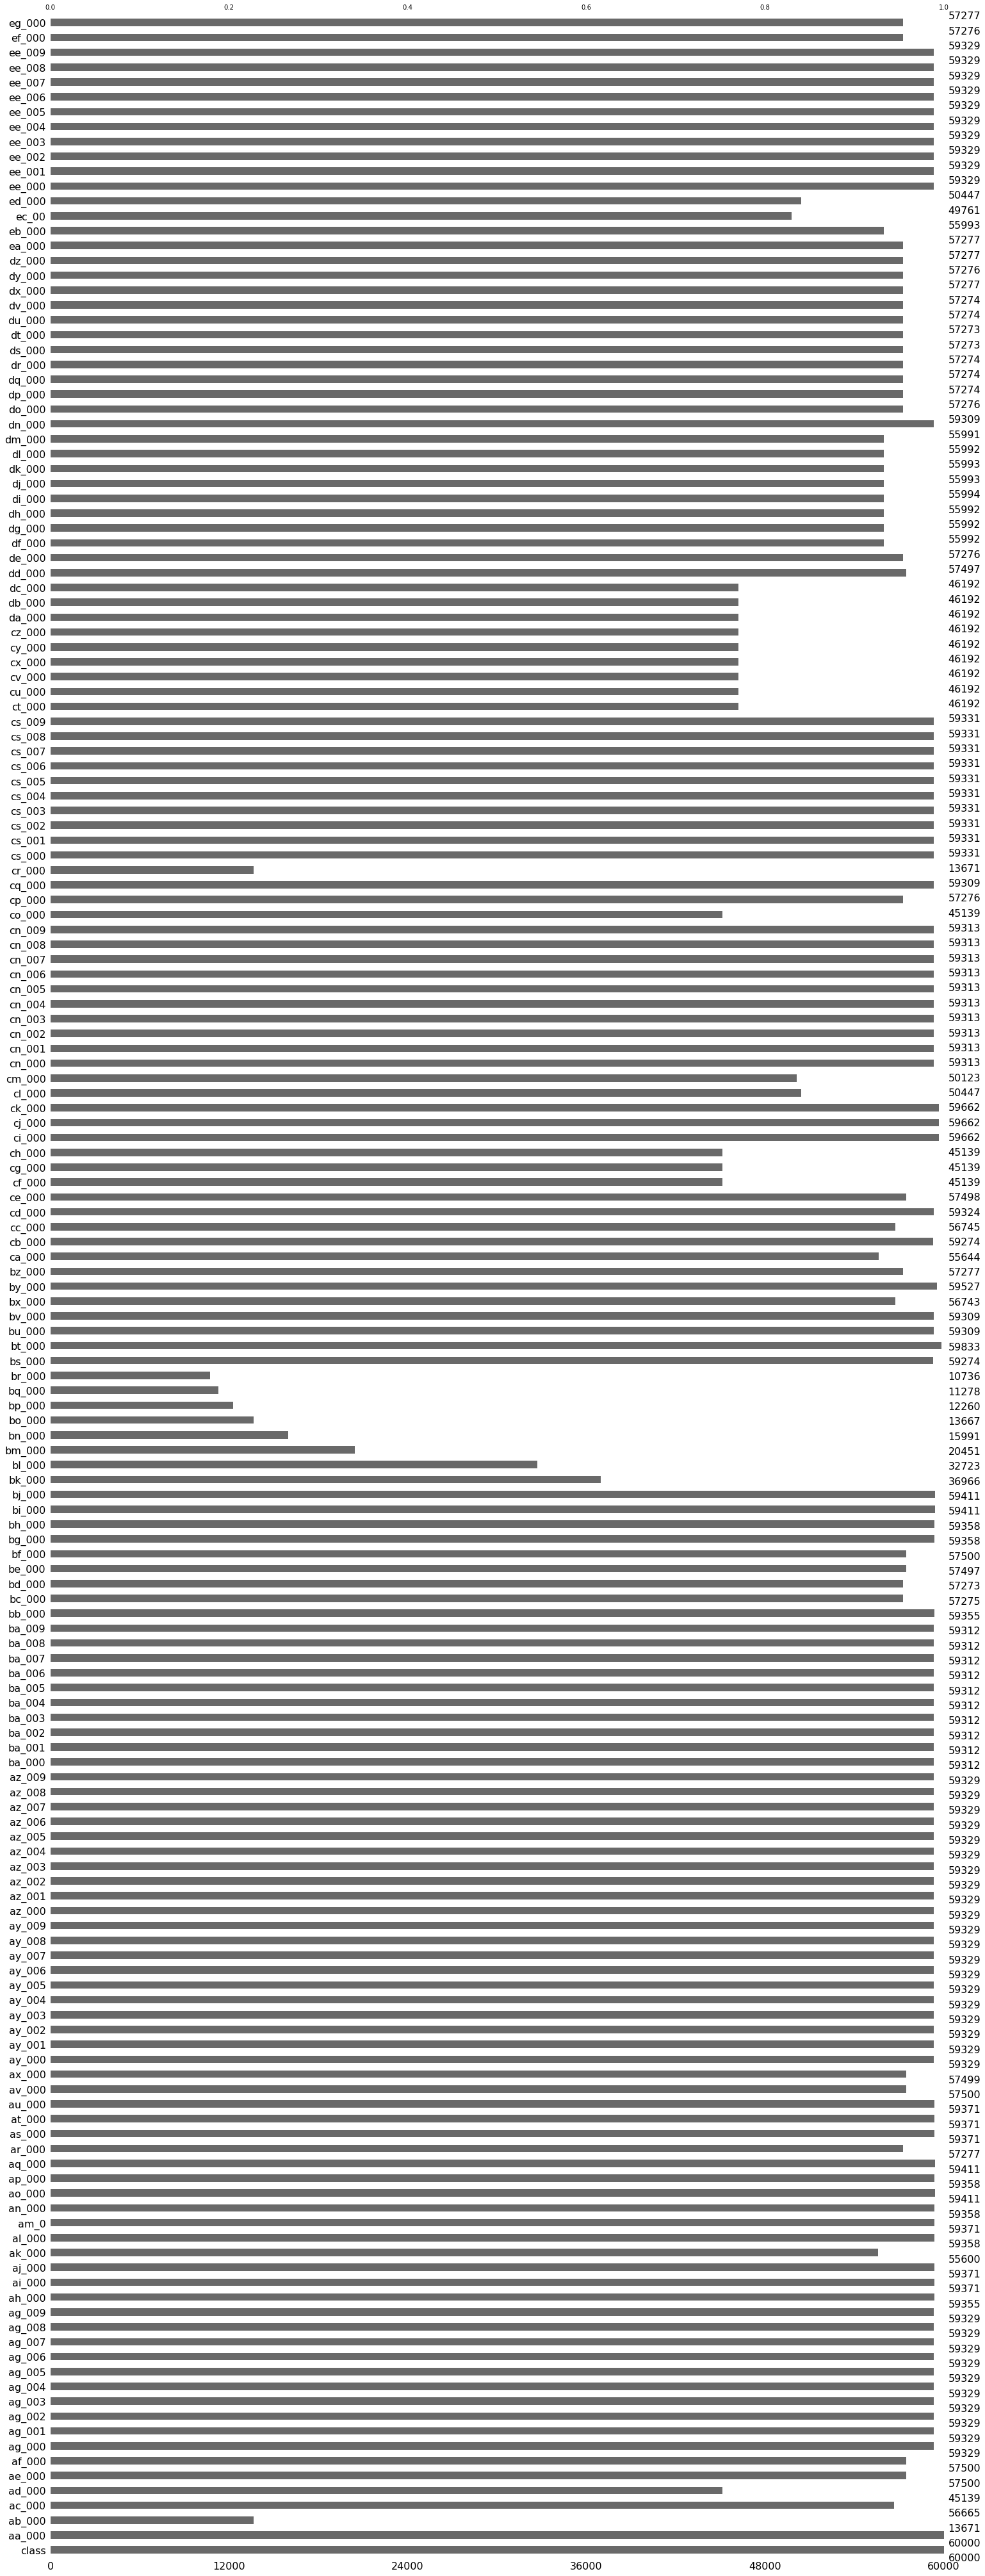

In [24]:
msno.bar(df_ap)

From the above plot we see,

* 7 features have missing values greater than 70%,
* 17 features have missing values between 20%-70% and
* the remaining features have missing values less than 20%.

With this we can conclude that we are working with a database with a high rate of missing values, so eliminating missing values is not a feasible option because we will lose information that could be important for the study. 

### Imputing Missing Values


Data imputation is a technique used to replace missing values with some substitute value to retain most of the information in the dataset, this technique is used when removing data from the dataset is not feasible as it can lead to a significant reduction in the size of the dataset, which can lead to incorrect analysis of the information.


(Harrison, 2019) states that the most frequent and consistent strategies that can be used with numerical or string data are the mean and median.


for this project we have decided to use the following strategy:

* We drop features(columns) with more than 70% missing values.
* For the rest of the features , we will impute those missing values using median.



In [25]:
missing = df_ap.isna().sum().div(df_ap.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
cols_missing = missing[missing[0]>70]
print("There are {} columns with NaNs above 70%.".format(len(cols_missing)))

There are 7 columns with NaNs above 70%.


In [26]:
cols_to_drop = list(cols_missing.index) # list with columns to drop
cols_to_drop

['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000']

In [27]:
df_ap = df_ap.drop(cols_to_drop, axis=1)


In [28]:
df_ap.shape

(60000, 164)

we can see the final result of the elimination of these columns using datafream.shape(), in this case we have eliminated 7 columns, which leaves us a total of 164 columns.

As we discussed earlier there are different ways of imputation, the most common being the **mean, median or mode**, these usually have a limited impact on the distribution of the data set; we might use the mean, for example, if the distribution is normal. However, if the data show some skewness, then the median might be the best choice.
in agreement with (Ton De Waal, Jeroen Pannekoek and Sander Scholtus, 2011) The choice of specific method depends on the actual situation.

let's check how skewness behaves in our dataset, based on them we can make the best decision; for that we will use the pandas function **dataframe.skew()** 

In [29]:
skewness=df_ap.skew(skipna=True)
skewness

aa_000      6.115752
ac_000      1.784845
ad_000    212.459406
ae_000     90.588252
af_000     51.671770
             ...    
ee_007     15.717250
ee_008     13.426265
ee_009     29.214135
ef_000     73.432440
eg_000     89.029482
Length: 163, dtype: float64

According to the results, all the data have a positive skewness so we can conclude that they have a right skew (also called positive skewness). this means that the right skewed distribution is longer on the right side of its peak than on the left side.

Based on this result we have decided to use the median as the imputation technique for this project; Pandas offers us a function **fillna** to perform this imputation in a simple way.

In [30]:
df_ap.fillna(df_ap.median(), inplace=True)

In [31]:
df_ap.isnull().sum()

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 164, dtype: int64

In [32]:
df_ap.isnull().any().sum()

0

Once we have done the imputation of the missing values, we performed a double check to make sure that there were no missing values in our dataset, according to the results obtained, we have eliminated all missing values.

## Feature Engineering

Feature engineering is the process of extracting and organising important features from raw data in such a way that it suits the purpose of the machine learning model. It can be seen as the art of selecting important features and transforming them into refined and meaningful features that fit the needs of the model.


According to (Walker, 2022), in order to improve the performance of machine learning models, it is necessary to go much deeper into feature engineering.


### Encoding

In most of the datasets we work with for data science we will encounter categorical variables, these variables are usually stored as text values. Since machine learning is based on mathematical equations, we would run into a problem if we kept the categorical variables as they are in their initial state. It is for this reason that the encoding of our categorical variables is of utmost importance for an excellent performance of our ML models.

In this case, we use the simplest way of coding, which is label coding. This method is very simple and consists of transforming each value of a column into a number generally starting with 0, we decided to use the following encoding:



In [33]:
encoding_label = {"class":     {"neg": 0, "pos": 1}}
                  
df_ap_encoding = df_ap.replace(encoding_label)
df_ap.replace(encoding_label).head()                  

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,2.0,46.0,0.0,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,8.0,0.0,3646660.0,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,210.0,278.0,1181117.0,44465.0,0.0,202.0,0.0,0.0,1734472.0,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,130640.0,239140.0,28000.0,41040.08,2673338.0,2673338.0,2678534.0,15439.0,7466.0,22436.0,248240.0,25

In [34]:
df_ap_encoding["class"].unique()

array([0, 1], dtype=int64)

Once we have encoded our label, we proceed to remove it in order to scale the data. 

In [35]:
aps_no_label = df_ap_encoding.drop("class", axis=1)

### Scaling

Just as (Walker, 2022) says; los models often perform better with scaling so that features with higher variability do not overwhelm the optimization.

Prior to the application of machine learning algorithms to the dataset, the magnitude of all key features must be fully understood, which is applicable for feature selection and search of independent and dependent variables. Then, we will have to scale them accordingly to fit them for analysis and modelling, the process of adjusting the magnitude of these features is the SCALING or Feature Scaling.

According to (Galarnyk, 2017) PCA is affected by scale, so it is necessary to scale the data characteristics before applying PCA. 

For this project we have decided to use StandardScaler to facilitate the standardisation of the characteristics of the dataset on the unit scale (mean = 0 and variance = 1), which is a requirement for the optimal performance of many machine learning algorithms such as PCA where the data worked on is assumed to have a Gaussian or normal distribution..



In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(aps_no_label)
X_scaled = scaler.transform(aps_no_label)
X_scaled

array([[ 1.19381409e-01,  2.31022415e+00, -4.08499000e-03, ...,
        -1.75698603e-01, -2.02567552e-02, -2.35397175e-02],
       [-1.80696612e-01, -4.32858945e-01, -4.08938435e-03, ...,
        -1.43927082e-01, -2.02567552e-02, -2.35397175e-02],
       [-1.25810664e-01, -4.32858652e-01, -4.09012626e-03, ...,
        -1.64811562e-01, -2.02567552e-02, -2.35397175e-02],
       ...,
       [-4.07240391e-01,  2.31022414e+00, -4.09246611e-03, ...,
        -1.75698603e-01, -2.02567552e-02, -2.35397175e-02],
       [ 1.44094526e-01,  2.31022414e+00, -4.07888355e-03, ...,
         8.05147339e+00, -2.02567552e-02, -2.35397175e-02],
       [-1.31435408e-01, -4.32858047e-01, -4.07505989e-03, ...,
        -1.72352003e-01, -2.02567552e-02, -2.35397175e-02]])

In [37]:
df_scaled=pd.DataFrame(X_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162
0,0.119381,2.310224,-0.004085,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.167274,0.103186,0.518102,0.362192,-0.042459,-0.029978,0.180223,-0.054934,-0.022591,-0.012434,-0.109015,-0.109228,0.192095,0.098135,0.250203,0.550907,-0.088073,-0.011451,-0.04218,-0.014518,-0.009916,-0.064343,-0.026718,-0.018931,-0.025479,-0.034801,-0.029628,0.258355,0.972212,-0.163286,-0.071677,-0.011802,-0.032929,-0.067166,-0.036539,-0.113842,-0.203221,0.530438,-0.109949,-0.061603,-0.044093,-0.012847,0.249553,0.057159,0.004152,0.019918,0.198765,0.974940,1.435939,-0.344766,-0.146400,-0.106043,0.202886,-0.137658,-0.184726,-0.134124,-0.040790,0.180566,0.263580,0.310116,0.161681,0.370950,0.319619,0.021345,1.172227,0.119525,0.204612,0.204612,0.256893,0.401803,-0.046719,0.446813,0.637595,0.262185,0.0,1.314011,-0.004083,0.048776,-0.012911,0.212845,-0.090339,0.094187,-0.065408,1.053696,-0.037972,-0.088790,-0.149090,-0.184919,0.010599,0.611842,0.756989,0.086650,-0.042222,-0.023110,-0.004084,-0.040174,0.204612,0.489485,0.154101,0.026156,0.152996,-0.005582,0.320927,0.303646,0.146407,-0.009102,-0.004203,-0.018961,-0.040464,0.733061,-0.172136,-0.027322,2.384944,-0.034052,0.118646,0.896340,0.180406,0.461154,-0.019123,-0.025984,-0.008116,-0.084558,-0.008511,-0.026999,-0.025164,-0.027578,0.297120,0.970930,1.904942,-0.045393,-0.145658,0.564595,0.691140,0.958719,0.641848,-0.186078,-0.128261,-0.019481,-0.028615,-0.152539,0.370080,0.419294,0.098933,0.363023,0.693832,0.524393,0.239087,0.070072,0.008264,-0.107586,-0.143103,-0.175699,-0.020257,-0.023540
1,-0.180697,-0.432859,-0.004089,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.175319,-0.136995,0.018291,0.015307,-0.016214,-0.029978,-0.097959,-0.054934,-0.021233,-0.012434,-0.109015,-0.109228,-0.114016,-0.126996,0.028432,-0.080598,-0.088073,-0.011451,-0.04218,-0.014518,-0.166506,-0.248817,-0.026718,-0.018931,-0.025479,-0.034801,-0.029628,-0.028279,-0.090637,0.091411,-0.237000,-0.011802,-0.006136,0.101439,0.054609,-0.112706,-0.108383,-0.037922,-0.096149,-0.061595,-0.044093,-0.012847,-0.003413,-0.189365,-0.177379,-0.158663,-0.123892,-0.096888,-0.068040,0.087933,0.213008,-0.091922,-0.079060,-0.115911,-0.090763,-0.105861,0.519465,-0.097978,-0.056642,0.134741,-0.063147,0.422228,0.346112,0.291456,-0.871968,-0.180925,-0.078136,-0.078137,-0.042636,-0.078494,0.264690,2.177647,-1.081117,-0.082046,0.0,-0.440299,-0.004083,-0.106026,-0.012911,-0.141720,-0.090339,-0.031355,-0.066798,-0.185446,-0.037972,-0.088790,-0.149055,-0.193790,-0.028327,-0.015036,-0.054830,-0.068062,-0.074704,-0.028967,-0.004090,-0.071771,-0.078137,0.068783,0.004303,-0.059157,-0.002446,-0.081126,-0.069222,-0.207496,-0.069425,-0.018610,-0.004203,-0.084589,-0.108428,-0.178354,-0.177252,-0.027322,-0.068009,-0.034052,-0.159759,-0.099394,0.028090,0.095306,-0.019123,-0.025984,-0.008116,-0.084558,-0.008511,-0.026999,-0.025164,-0.027578,0.002212,0.154441,-0.060116,-0.045393,-0.145658,0.076479,0.035477,0.055367,0.147312,-0.186078,-0.128261,-0.019481,-0.028615,-0.136178,0.297591,0.302633,-0.026471,0.017670,-0.018901,-0.059135,-0.129021,-0.131171,-0.184975,-0.152281,-0.088650,-0.143927,-0.020257,-0.023540
2,-0.125811,-0.432859,-0.004090,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.182351,-0.224093,0.060103,-0.142809,-0.105853,-0.029978,-0.136196,-0.054934,-0.022591,-0.012434,-0.109015,-0.109228,-0.138391,-0.120147,-0.226663,-0.227708,-0.088073,-0.011451,-0.04218,-0.014518,-0.111112,-0.173100,-0.0

## PCA

According to (Jolliffe and Cadima,2016) Their idea of PCA is simple: reduce the dimensionality of a dataset, while preserving as much "variability" (i.e. statistical information) as possible.

In short, PCA is a dimensionality reduction technique that transforms a set of features in a dataset into a smaller number of features called principal components while at the same time trying to retain as much information in the original dataset as possible.

Only three lines of code are needed to perform the PCA using Python's Scikit-Learn library. 
Implementing the PCA is a two-step process:

Initialise the PCA class by entering the number of components in the constructor.
Call the fit and transform methods by passing the feature set to these methods. The transform method returns the specific number of principal components.




In [38]:
pca = PCA().fit(df_scaled) 
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

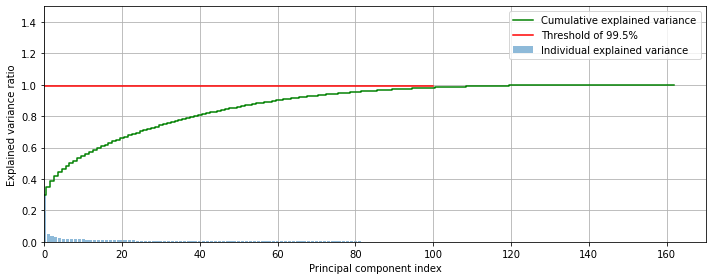

In [39]:

# Create the visualization plot

plt.rcParams["figure.figsize"]=(10,4)

plt.rcParams["figure.figsize"]=(10,4)

plt.ylim(0,1.5)
plt.xlim(0,170)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',
         label='Cumulative explained variance', color='green')
plt.plot([0,100], [0.995, 0.995], color='red', label='Threshold of 99.5%')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.grid()
plt.show()

Once the code is applied, we will use a graph to help us choose the number of components, the key part of using PCA is the ability to estimate how many components are needed to describe the data.  This is easily determined by looking at the cumulative explained variance ratio as a function of the number of components.

For this analysis we have been asked to establish the minimum number of characteristics necessary to retain 99.5% of the variation in the data, as we can see from the data, the minimum number of components in **95 feactures**.

In [40]:
pca = PCA(95)
projected = pca.fit_transform(df_scaled)

In [41]:
projected.shape

(60000, 95)

In [42]:
ap_data_PCA= pd.DataFrame(projected)

In [43]:
ap_data_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,2.370113,-1.173382,1.898636,-0.055396,0.721217,-0.391552,0.009162,-0.326882,-0.546677,-1.382092,-0.878121,0.115096,-0.202445,-0.060790,0.050378,0.122823,0.093178,0.171247,0.130745,0.539116,0.158567,-0.506505,-1.116463,0.089825,-0.388271,0.226129,0.436451,0.030902,-0.186777,-0.580356,0.414934,0.205844,1.637963,0.136278,-0.854971,-0.805129,0.170438,-0.025779,-0.039931,-0.230235,-0.757087,0.617204,-0.269989,-0.357498,-0.733438,-0.038817,1.086560,0.013349,0.009794,0.205074,-0.075561,-0.643509,-0.400701,-0.545412,-0.391664,0.084080,-0.413714,-0.160716,0.046590,0.115551,0.267724,-0.070175,0.300140,0.616324,-0.699561,-0.116992,-0.398326,-0.196641,-0.197295,0.136975,0.474855,-0.277080,-0.967730,0.064024,-0.514198,0.091674,0.082787,0.227617,-0.172030,-0.110575,0.328213,-0.052929,-0.061832,-0.257200,-0.064297,0.424860,-0.466301,-0.167514,0.229502,0.252046,0.078906,0.026366,-0.220736,-0.372793,0.064196
1,-0.620295,-0.552642,0.053729,-0.097331,-0.016377,-0.152152,-0.016837,0.301157,0.664698,-0.282555,-0.138119,0.171039,-0.187249,-0.064821,-0.060608,0.175321,-0.031851,0.008329,-0.075514,0.290561,-0.022572,0.074342,-0.188443,0.001134,-0.184276,0.096715,0.087183,-0.183222,-0.041495,-0.013244,-0.170434,-0.139845,-0.387850,0.246662,0.126721,0.132643,-0.050760,-0.075416,0.022387,0.020218,-0.027763,-0.009923,0.018162,0.026608,0.172340,0.003258,-0.086449,-0.140954,-0.015935,0.250664,-0.131580,0.042479,-0.134988,0.107824,0.059939,0.072782,-0.016512,0.137611,-0.008763,-0.103164,0.010125,0.047797,0.105812,0.064382,-0.251304,-0.375698,0.118378,-0.312633,-0.213465,-0.581402,-0.374288,0.252934,0.610283,-0.386306,0.831374,0.326088,-0.034749,0.332355,0.003663,-0.350667,-0.531968,0.165694,-0.377354,-0.235949,-0.058847,0.270859,0.249088,0.216765,-0.054997,-0.045588,0.226890,-1.375433,0.314643,0.249544,0.402176
2,-1.212050,-0.111156,-0.221698,-0.168800,0.308080,0.054670,-0.006881,-0.262244,-0.473643,0.655403,0.425114,-0.336549,-0.049394,0.026008,0.063049,-0.053793,-0.161578,0.281159,0.133132,0.026656,-0.055334,-0.071073,-0.237299,0.030978,0.091756,-0.120024,-0.019154,-0.035640,-0.151262,-0.013568,-0.373450,-0.003673,-0.348274,0.104991,-0.038212,-0.090460,-0.235962,0.044972,0.026051,0.113914,-0.235485,-0.063742,-0.029234,-0.075999,0.129913,0.178464,-0.084418,-0.106909,-0.082274,-0.109388,0.173018,-0.073643,-0.049132,-0.138872,0.041117,-0.010517,-0.025602,-0.086538,0.031594,0.037167,0.299059,-0.097449,-0.174460,-0.118999,-0.110950,-0.048521,-0.024442,-0.034325,0.034213,-0.064057,0.010590,-0.026747,0.084495,-0.097001,0.056487,0.004578,0.051586,0.137388,-0.072919,0.044774,-0.054079,-0.040689,-0.005671,-0.007489,-0.026172,-0.002089,0.032676,0.014452,-0.022428,-0.055093,-0.023748,0.161072,-0.025040,-0.051047,-0.083955
3,-3.194958,0.224720,-0.753668,0.251971,-0.115950,0.231461,-0.030273,0.522891,0.233683,1.091758,0.795903,-0.566844,1.043789,0.351938,-0.239231,0.318252,0.464437,-0.025736,0.934180,-0.004867,0.331416,0.519660,-0.162956,0.138703,-0.032446,0.002443,-0.077506,0.207607,0.488602,0.737020,-0.128184,1.916624,-0.207345,1.594115,0.024325,-0.367612,-0.063253,-0.028365,0.071985,-0.110926,0.343714,-0.134787,0.200930,-0.120884,0.036535,0.071435,0.075959,0.009556,0.257249,0.332274,0.704110,1.442178,-0.809599,-0.362231,0.352495,-0.535535,-0.234533,-0.096700,0.160116,0.015410,0.042489,0.166251,-0.140211,-0.087222,-0.032485,-0.106084,0.049876,-0.010543,0.050503,0.152861,0.198873,0.117732,-0.066789,0.047121,0.166935,-0.265161,-0.150845,-0.143965,-0.195597,-0.038711,-0.033301,-0.060199,-0.002950,-0.005580,-0.016025,0.114943,-0.095931,-0.010855,0.007606,0.010964,-0.023610,0.038925,-0.026003,0.037766,0.020178
4,0.317814,-0.099342,0.845841,-0.575063,0.197947,-0.068534,0.018403,-0.505617,-0.388400,-1

Once we have our new datafream we proceed to add again our label, so we will have a new datafream ready to use in any ML model. 

In [1]:
ap_data_PCA["class"]=df_ap_encoding["class"]

NameError: name 'df_ap_encoding' is not defined

In [45]:
ap_data_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,class
0,2.370113,-1.173382,1.898636,-0.055396,0.721217,-0.391552,0.009162,-0.326882,-0.546677,-1.382092,-0.878121,0.115096,-0.202445,-0.060790,0.050378,0.122823,0.093178,0.171247,0.130745,0.539116,0.158567,-0.506505,-1.116463,0.089825,-0.388271,0.226129,0.436451,0.030902,-0.186777,-0.580356,0.414934,0.205844,1.637963,0.136278,-0.854971,-0.805129,0.170438,-0.025779,-0.039931,-0.230235,-0.757087,0.617204,-0.269989,-0.357498,-0.733438,-0.038817,1.086560,0.013349,0.009794,0.205074,-0.075561,-0.643509,-0.400701,-0.545412,-0.391664,0.084080,-0.413714,-0.160716,0.046590,0.115551,0.267724,-0.070175,0.300140,0.616324,-0.699561,-0.116992,-0.398326,-0.196641,-0.197295,0.136975,0.474855,-0.277080,-0.967730,0.064024,-0.514198,0.091674,0.082787,0.227617,-0.172030,-0.110575,0.328213,-0.052929,-0.061832,-0.257200,-0.064297,0.424860,-0.466301,-0.167514,0.229502,0.252046,0.078906,0.026366,-0.220736,-0.372793,0.064196,0
1,-0.620295,-0.552642,0.053729,-0.097331,-0.016377,-0.152152,-0.016837,0.301157,0.664698,-0.282555,-0.138119,0.171039,-0.187249,-0.064821,-0.060608,0.175321,-0.031851,0.008329,-0.075514,0.290561,-0.022572,0.074342,-0.188443,0.001134,-0.184276,0.096715,0.087183,-0.183222,-0.041495,-0.013244,-0.170434,-0.139845,-0.387850,0.246662,0.126721,0.132643,-0.050760,-0.075416,0.022387,0.020218,-0.027763,-0.009923,0.018162,0.026608,0.172340,0.003258,-0.086449,-0.140954,-0.015935,0.250664,-0.131580,0.042479,-0.134988,0.107824,0.059939,0.072782,-0.016512,0.137611,-0.008763,-0.103164,0.010125,0.047797,0.105812,0.064382,-0.251304,-0.375698,0.118378,-0.312633,-0.213465,-0.581402,-0.374288,0.252934,0.610283,-0.386306,0.831374,0.326088,-0.034749,0.332355,0.003663,-0.350667,-0.531968,0.165694,-0.377354,-0.235949,-0.058847,0.270859,0.249088,0.216765,-0.054997,-0.045588,0.226890,-1.375433,0.314643,0.249544,0.402176,0
2,-1.212050,-0.111156,-0.221698,-0.168800,0.308080,0.054670,-0.006881,-0.262244,-0.473643,0.655403,0.425114,-0.336549,-0.049394,0.026008,0.063049,-0.053793,-0.161578,0.281159,0.133132,0.026656,-0.055334,-0.071073,-0.237299,0.030978,0.091756,-0.120024,-0.019154,-0.035640,-0.151262,-0.013568,-0.373450,-0.003673,-0.348274,0.104991,-0.038212,-0.090460,-0.235962,0.044972,0.026051,0.113914,-0.235485,-0.063742,-0.029234,-0.075999,0.129913,0.178464,-0.084418,-0.106909,-0.082274,-0.109388,0.173018,-0.073643,-0.049132,-0.138872,0.041117,-0.010517,-0.025602,-0.086538,0.031594,0.037167,0.299059,-0.097449,-0.174460,-0.118999,-0.110950,-0.048521,-0.024442,-0.034325,0.034213,-0.064057,0.010590,-0.026747,0.084495,-0.097001,0.056487,0.004578,0.051586,0.137388,-0.072919,0.044774,-0.054079,-0.040689,-0.005671,-0.007489,-0.026172,-0.002089,0.032676,0.014452,-0.022428,-0.055093,-0.023748,0.161072,-0.025040,-0.051047,-0.083955,0
3,-3.194958,0.224720,-0.753668,0.251971,-0.115950,0.231461,-0.030273,0.522891,0.233683,1.091758,0.795903,-0.566844,1.043789,0.351938,-0.239231,0.318252,0.464437,-0.025736,0.934180,-0.004867,0.331416,0.519660,-0.162956,0.138703,-0.032446,0.002443,-0.077506,0.207607,0.488602,0.737020,-0.128184,1.916624,-0.207345,1.594115,0.024325,-0.367612,-0.063253,-0.028365,0.071985,-0.110926,0.343714,-0.134787,0.200930,-0.120884,0.036535,0.071435,0.075959,0.009556,0.257249,0.332274,0.704110,1.442178,-0.809599,-0.362231,0.352495,-0.535535,-0.234533,-0.096700,0.160116,0.015410,0.042489,0.166251,-0.140211,-0.087222,-0.032485,-0.106084,0.049876,-0.010543,0.050503,0.152861,0.198873,0.117732,-0.066789,0.047121,0.166935,-0.265161,-0.150845,-0.143965,-0.195597,-0.038711,-0.033301,-0.060199,-0.002950,-0.005580,-0.016025,0.114943,-0.095931,-0.010855,0.007606,0.010964,-0.023610,0.038925,-0.026003,0.037766,0.020178,0
4,0.317814,-0.099342,0.845841,-0.575063,0.197947,-0.068534,0.018403,-0.50561

###  Training in diferentents ML algoritmos 

In [46]:
ap_array = ap_data_PCA.values

In [47]:
from sklearn.model_selection import train_test_split
X = ap_array[:,0:95]
y = ap_array[:,95]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [48]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [49]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [50]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring= "accuracy")
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)' % (name,cv_result.mean(), cv_result.std()))

LR: 0.990104 (0.000792)
LDA: 0.988958 (0.001494)
KNN: 0.989687 (0.000797)
CART: 0.986292 (0.001020)
NB: 0.965625 (0.001718)
SVM: 0.986104 (0.000625)


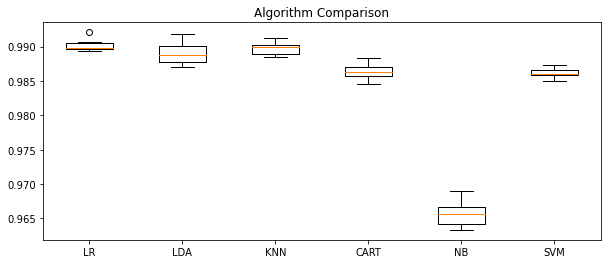

In [51]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [52]:
model= KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9904166666666666


In [53]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9898333333333333


## Curse of Dimensionality

We might think that increasing the number of explanatory variables improves the predictive ability of the models. This would generally be true if the predictors were really useful in explaining the response. However, increasing the number of dimensions can significantly aggravate many of the problems that may already appear in lower dimensions, this is known as curse of dimensionality, a term coined by (Bellman, 2015).

When we have many dimensions, statistical problems arise. We always want our model to be as accurate as possible, but by having so many variables, some will be unimportant features and others may be merely arbitrary, this leads to a drop in the accuracy of the model. It is not only the number of features that can cause problems, but also their types. Some types are more easily handled by the computer than others.
The computer also gets into difficulties in handling so much data, trying to make sense of it in order to create a good model. Having so many features makes it very difficult to make clusters, and all the algorithms that use distance can get confused, as so many variables make the points appear equidistant.

In conclusion, high dimensionality can be a problem and it is necessary to understand the effect it has on the data and how algorithms are affected by it. However, there are cases where having higher dimensionality can help. 



## Conclusion

The present CA represented a challenge for us due to the large amount of missing values it contained, most of the time spent in the analysis was spent analysing which would be the best option to impute the missing values, in the end we decided to impute with the median of the data, because it did not follow a normal distribution, we discarded the mean because of the amount of outliers we had. 

The second challenge was to realise that our label is highly unbalanced, and that the values of the positive class, which are the ones that have direct direction with the failure, are only 10% of the data, which could cause us a false prediction when making our ML model. 

Finally, when performing our PCA to obtain the requested variance, our number of components was 95, when performing the cross validation with the different models we can decide that the one with the best accuracy was KNN with 98%.

## References

Bellman, R.E. (2015). Adaptive Control Processes. Princeton University Press.

Boschetti, A. and Luca Massaron (2016). Python data science essentials : become an efficient data science practitioner by understanding Python’s key concepts. Birmingham, England ; Mumbai, India: Packt Publishing.

Bruce, P. and Bruce, A. (2017). Practical Statistics for Data Scientists. ‘O’Reilly Media, Inc.’

FernándezA., GarcíaS., Galar, M., Prati, R.C., Bartosz Krawczyk and Herrera, F. (2018). Learning from imbalanced data sets. New York, Ny: Springer Science+Business Media.

Galarnyk, M. (2017). PCA using Python (scikit-learn). [online] Medium. Available at: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60.

Harrison, M. (2019). Machine learning pocket reference : working with structured data in Python. North Sebastopol, Ca: O’reilly Media, Inc.

Jolliffe, I.T. and Cadima, J. (2016). Principal component analysis: a review and recent developments. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 374(2065), p.20150202. doi:10.1098/rsta.2015.0202.

Kuhn, M. and Johnson, K. (2019). Feature Engineering and Selection. CRC Press.

McDonald, A. (2021). Using the missingno Python library to Identify and Visualise Missing Data Prior to Machine Learning. [online] Medium. Available at: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009.

Mckinney, W. (2018). Python for data analysis : data wrangling with pandas, NumPy, and IPython. Sebastopol, Ca: O’reilly Media, Inc., October.

Moffitt, C. (2017). Guide to Encoding Categorical Values in Python - Practical Business Python. [online] Pbpython.com. Available at: https://pbpython.com/categorical-encoding.html.

Ozdemir, S. and Susarla, D. (2018). Feature engineering made easy : identify unique features from your dataset in order to build powerful machine learning systems. Birmingham, UK: Packt Publishing.

pandas.pydata.org. (n.d.). Working with missing data — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html.

scikit-learn.org. (n.d.). sklearn.impute.SimpleImputer — scikit-learn 0.24.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html.

Sullivan, J. (2018). Data Cleaning with Python and Pandas: Detecting Missing Values. [online] Medium. Available at: https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b.

Ton De Waal, Jeroen Pannekoek and Sander Scholtus (2011). Handbook of data editing and imputation. Hoboken, N.J.: Wiley.

Walker, M. (2022). Data Cleaning and Exploration with Machine Learning. Packt Publishing Ltd.

Witten, I.H. and Al, E. (2017). Data mining : practical machine learning tools and techniques. Amsterdam: Morgan Kaufmann.